In [10]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ/'
date = '190226'
larvaID = 'Larva_3'
fov = 'FOV1'
sensor = 'GCaMP783'


In [11]:
%matplotlib inline
import numpy as np
import os
import shutil
from registration import CrossCorr
from skimage.io import imsave
from glob import glob
import tifffile as tff
import matplotlib.pyplot as plt
import scipy.io as sio


In [12]:
matFile = os.path.join(imgPath, date, larvaID, fov, 'summary/_dff.mat')
dffSingleFOV = sio.loadmat(matFile)


In [13]:
matFile = os.path.join(imgPath, date, larvaID, fov, 'summary/_f0.mat')
f0SingleFOV = sio.loadmat(matFile)


In [14]:
# f0SingleFOV['f0'].shape

In [15]:
# f0SingleFOV['f0'][0,0]

In [16]:
print dffSingleFOV['dff'].shape
numOfTrials = dffSingleFOV['dff'].shape[0]
nomOfRois = dffSingleFOV['dff'].shape[1]
numOfFrames = dffSingleFOV['dff'].shape[2]


(9, 6, 405)


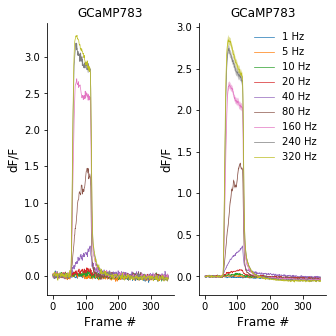

In [20]:
trialMap = {
            1: '1 Hz',
            2: '5 Hz',
            3: '10 Hz',
            4: '20 Hz',
            5: '40 Hz',
            6: '80 Hz',
            7: '160 Hz',
            8: '240 Hz',
            9: '320 Hz'
           }

roiNum = 2

plt.figure(figsize=(5,5))

ax1 = plt.subplot(121)
for trialNum in range (numOfTrials):
    ax1.plot(dffSingleFOV['dff'][trialNum, roiNum, 50:], lw=0.7, label=trialMap[trialNum+1])

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_title(sensor)
ax1.set_xlabel('Frame #', size=12)
ax1.set_ylabel('dF/F', size=12)
ax1.get_ylim()

# All ROIs for all trials

ax2 = plt.subplot(122)
for trialNum in range (numOfTrials):
    mean = np.mean(dffSingleFOV['dff'][trialNum, :, 50:], axis=0)
    error = np.std(dffSingleFOV['dff'][trialNum, :, 50:], axis=0)/(dffSingleFOV['dff'][trialNum, :, 50:].shape[0]-1)
    ax2.plot(np.arange(1, numOfFrames+1-50), mean, lw=0.7, label=trialMap[trialNum+1])
    ax2.fill_between(np.arange(1, numOfFrames+1-50),mean-error, mean+error, alpha=0.5)
leg2 = ax2.legend()
leg2.get_frame().set_linewidth(0.0)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_title(sensor)
ax2.set_xlabel('Frame #', size=12)
ax2.set_ylabel('dF/F', size=12)
# plt.ylim(-0.2,3.2)
# ax2.set_ylim(ax1.get_ylim())
plt.show()
# ax1.get_ylim()[1]
